# General aim of the notebook
The notebook aims at analyzing the feature importance.
# How to use this notebook
By default, the model used is the Random Forest Classifier. If needed, change the *Training* section with other models, e.g. the ones used in the processing Notebooks, such as *Models.ipynb*.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
data_train_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Train_80.csv'
data_test_path = 'C:/Users/manon/Desktop/Projet_2 _ML/code/datas/Split_48_neutre/Combined_All_Test_80.csv'

tx_train = pd.read_csv(data_train_path,sep=",",squeeze=True)
X_train=tx_train.iloc[:, :48]
ytr = pd.read_csv(data_train_path,sep=",",usecols=[48],squeeze=True)

tx_test = pd.read_csv(data_test_path,sep=",",squeeze=True)
X_test=tx_test.iloc[:, :48]
yte = pd.read_csv(data_test_path,sep=",",usecols=[48],squeeze=True)

def add_column_names(data):
    
    liste=[]
    for i in range(48):
        liste.append(str(i+1))
    data.columns=liste
    return data,liste

X_train,liste = add_column_names(X_train)
X_test,liste = add_column_names(X_test)

ytr = ytr.astype(np.int64)
yte = yte.astype(np.int64)

## Preprocessing

In [3]:
def standardize(x):
    """Standardize the original data set."""
    mean_x = np.mean(x)
    x = x - mean_x
    std_x = np.std(x)
    x = x / std_x
    return x
Xtrain=standardize(X_train)
X_test=standardize(X_test)

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training

In [5]:
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'gini', max_depth=9,random_state = 42)
classifier.fit(X_train, ytr)
Y_pred = classifier.predict(X_test)

# Feature importance

In [6]:
feature_imp = pd.Series(classifier.feature_importances_,index=liste).sort_values(ascending=False)
#feature_imp
def cm_to_inch(value):
    return value/2.54

In [7]:
# Saving the feature importance
output_path = "feature_importance.csv"
pd.DataFrame(feature_imp).to_csv(output_path,header=['Feature_Importance_Score'], index=True)

No handles with labels found to put in legend.


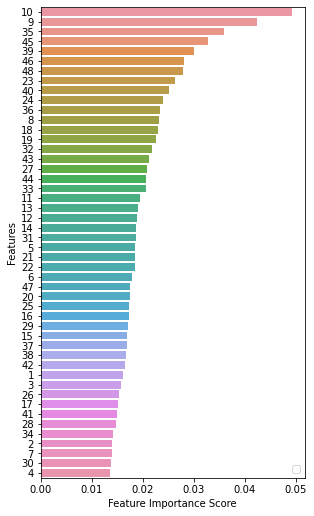

In [8]:
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(cm_to_inch(12),cm_to_inch(22)))
sns.barplot(x=feature_imp[:48], y=feature_imp.index[:48])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.legend()
plt.show()